In [241]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv('강의계획서_전선.csv',encoding='cp949')

In [206]:
df.head(3)

,연도,단과대학,과목번호,원어여부,비고,수강신청유의사항,과제비율,교재,과제내용,과제수,주별강의계획서,중간고사,기말고사
0,2022,KU융합과학기술원,3854,영어,미래에너지공학과 우선수강,없음,"{'출석률': 10.0, '기말고사비율': 80.0, '과제물비율': 10.0}",NaN,"{1: '실험결과를 바탕으로 한 해석', 2: '20191211', 3: ''}",1.0,"{1: '08/29 ~ 09/03', 2: 'Introduction', 3: 'Ba...","{'주제': 'Surface characterization II', '강의내용': ...","{'주제': 'Final exam', '강의내용': 'Final exam', '수업..."
1,2022,KU융합과학기술원,3855,영어,미래에너지공학과만 수강,미래에너지공학과 학생만 수강 가능.\n ( Only Students of dep...,"{'출석률': 20.0, '중간고사비율': 20.0, '기말고사비율': 50.0, ...","{1: '주교재', 2: 'PDF file', 3: '', 4: '', 5: ''}","{1: 'Summary for Literature survey', 2: '20211...",1.0,"{1: '08/29 ~ 09/03', 2: 'Introduction', 3: 'In...","{'주제': 'Mid-term exam', '강의내용': 'Mid-term exam...","{'주제': 'Final exam', '강의내용': 'Final exam', '수업..."
2,2022,KU융합과학기술원,3856,,미래에너지공학과 우선수강,없음,"{'출석률': 10.0, '중간고사비율': 40.0, '기말고사비율': 40.0, ...","{1: '부교재', 2: '기기분석', 3: '정맹준', 4: '드림플러스', 5:...","{1: '나노소재 물성 분석에 대한 최신 기술 동향', 2: '20211206', ...",1.0,"{1: '08/29 ~ 09/03', 2: '강의 개요', 3: '기기분석학 소개'...","{'주제': '나노소재 분석기술', '강의내용': '화학적 특성 분석법', '수업...","{'주제': '-', '강의내용': '-', '수업유형': '', '강의활동': ''}"


In [207]:
df.shape

(3483, 13)

In [208]:
df[df['수강신청유의사항'] == '#NAME?']

,연도,단과대학,과목번호,원어여부,비고,수강신청유의사항,과제비율,교재,과제내용,과제수,주별강의계획서,중간고사,기말고사


- 원어강의 여부
- 선수과목 존재 여부
- 조별과제 존재 여부
- 과제 개수
- 시험 과제대체 여부
- 패논패 여부

In [209]:
# 열 이름 변경
df.rename(columns={'과제비율':'평가비율'},inplace=True)

In [210]:
# 딕셔너리로 저장된 데이터를 str에서 딕셔너리로 변환
def convert_to_dictionary(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return x

In [211]:
df['평가비율'] = df['평가비율'].apply(convert_to_dictionary)
df['교재'] = df['교재'].apply(convert_to_dictionary)
df['과제내용'] = df['과제내용'].apply(convert_to_dictionary)
df['주별강의계획서'] = df['주별강의계획서'].apply(convert_to_dictionary)
df['중간고사'] = df['중간고사'].apply(convert_to_dictionary)
df['기말고사'] = df['기말고사'].apply(convert_to_dictionary)

### 선수과목 존재 여부

In [212]:
# 결측치 처리
df['비고'] = df['비고'].fillna('')
df['수강신청유의사항'] = df['수강신청유의사항'].fillna('')

In [213]:
keywords = ['선수과목', '선이수', '이수요망', '이수자만', 'prerequisite']
no_keywords = ['선수과목이필', '선수과목은필', '선수과목은없', 'keytheories', 'Noprerequisite']

def filter_text(raw_text):
    # 텍스트 내 공백 제거
    text = raw_text.replace(" ", "")
    # 키워드 포함 여부 확인
    contains_keyword = any(keyword in text for keyword in keywords)
    # 제외 키워드 포함 여부 확인
    contains_no_keyword = any(no_keyword in text for no_keyword in no_keywords)
    # 조건에 따라 T/F 반환
    return contains_keyword and not contains_no_keyword

# DataFrame에 두 컬럼에 대해 조건 적용
df['선수과목존재여부'] = df.apply(
    lambda row: 1 if (filter_text(row['비고']) or filter_text(row['수강신청유의사항'])) else 0, 
    axis=1
)

In [214]:
df.선수과목존재여부.value_counts()

선수과목존재여부
0    3315
1     168
Name: count, dtype: int64

### 조별과제 존재 여부

In [215]:
# 평가비율이 기재되지 않은 경우 검색
for i in range(len(df)):
    try:
        df['평가비율'][i].keys()
        pass
    except:
        print(f"{df.loc[i,'연도']}년 과목번호: {df.loc[i,'과목번호']}")

2022년 과목번호: 3877
2022년 과목번호: 3381
2023년 과목번호: 4315


- 2022년 과목번호: 3877  =>  ICT서비스제작기획
- 2022년 과목번호: 3381  =>  스킨케어연구- 2023년 과목번호: 4315  =>  DESIGN BUSINESS

In [216]:
# 과목별 평가항목 검색
unique_criterion = set()
for i in range(len(df)):
    try:
        criterion = list(df['평가비율'][i].keys())
        unique_criterion.update(criterion)
    except:
        pass

In [217]:
# list(unique_criterion)

In [218]:
keywords = ['팀프로젝트', '조별과제', '조별활동', '조별발표', '팀플', '팀원', 'team']

def filter_text(raw_text):
    # 텍스트 내 공백 제거
    text = raw_text.replace(" ", "")
    # 키워드 포함 여부 확인
    return any(keyword in text for keyword in keywords)

# DataFrame에 두 컬럼에 대해 조건 적용
df['조별과제존재여부'] = df.apply(
    lambda row: 1 if (filter_text(row['비고']) or filter_text(row['수강신청유의사항'])) else 0, 
    axis=1
)

In [219]:
# filtered_rows = df[df['수강신청유의사항'].apply(filter_text)]
# for raw_text in filtered_rows['수강신청유의사항']:
#     print(raw_text)
#     print('-----------')

In [220]:
df.조별과제존재여부.value_counts()

조별과제존재여부
0    3319
1     164
Name: count, dtype: int64

## 시험 과제대체 여부
- 해당 교과목들은 과제대체를 중간고사만 하는지, 기말고사만 하는지, 둘 다 하는지는 우선 파악하지 못하였음.

In [221]:
df['시험과제대체여부'] = 0 

for i in range(len(df)):
    # 딕셔너리로 저장된 데이터의 value 가져오기
    try:
        mid_exam = df.loc[i,'중간고사'].values()
        final_exam = df.loc[i,'기말고사'].values()
    except:
        pass

    # 원소들을 하나의 문자열로 합친 후 공백을 제거하기
    mid_text = ''.join(mid_exam).replace(" ", "")
    final_text = ''.join(final_exam).replace(" ", "")
    text = mid_text + final_text    

    # 시험 과제대체 여부 검색
    if '대체' in text or '발표' in text or 'project' in text or 'presentation' in text:
        df.loc[i,'시험과제대체여부'] = 1
    elif '과제대체' in df.loc[i,'수강신청유의사항'] or '대체과제' in df.loc[i,'수강신청유의사항']:
        df.loc[i,'시험과제대체여부'] = 1
    elif '과제대체' in df.loc[i,'비고'] or '대체과제' in df.loc[i,'비고']:
        df.loc[i,'시험과제대체여부'] = 1

In [222]:
df.시험과제대체여부.value_counts()

시험과제대체여부
0    2878
1     605
Name: count, dtype: int64

## 패논패 여부

In [223]:
keywords = ['Pass','P/N','패스과목','pass과목','nonpass']

def filter_text(raw_text):
    # 텍스트 내 공백 제거
    text = raw_text.replace(" ", "")
    # 키워드 포함 여부 확인
    return any(keyword in text for keyword in keywords)

# DataFrame에 두 컬럼에 대해 조건 적용
df['패논패여부'] = df.apply(
    lambda row: 1 if (filter_text(row['비고']) or filter_text(row['수강신청유의사항'])) else 0, 
    axis=1
)

In [224]:
df.패논패여부.value_counts()

패논패여부
0    3477
1       6
Name: count, dtype: int64

## 최종

In [225]:
df.columns

Index(['연도', '단과대학', '과목번호', '원어여부', '비고', '수강신청유의사항', '평가비율', '교재', '과제내용',
       '과제수', '주별강의계획서', '중간고사', '기말고사', '선수과목존재여부', '조별과제존재여부', '시험과제대체여부',
       '패논패여부'],
      dtype='object')

In [226]:
final_df = df[['연도', '단과대학', '과목번호', '원어여부', '과제수',
               '선수과목존재여부', '조별과제존재여부', '시험과제대체여부', '패논패여부']]

In [227]:
final_df.shape

(3483, 9)

In [232]:
final_df.head(10)

,연도,단과대학,과목번호,원어여부,과제수,선수과목존재여부,조별과제존재여부,시험과제대체여부,패논패여부
0,2022,KU융합과학기술원,3854,영어,1.0,0,0,0,0
1,2022,KU융합과학기술원,3855,영어,1.0,0,0,0,0
2,2022,KU융합과학기술원,3856,,1.0,0,0,0,0
3,2022,KU융합과학기술원,3857,영어,1.0,0,0,0,0
4,2022,KU융합과학기술원,3858,,1.0,0,1,1,0
5,2022,KU융합과학기술원,3859,,1.0,0,0,0,0
6,2022,KU융합과학기술원,3860,,1.0,0,0,0,0
7,2022,KU융합과학기술원,3861,영어,1.0,0,0,0,0
8,2022,KU융합과학기술원,3862,영어,6.0,0,0,0,0
9,2022,KU융합과학기술원,3863,영어,4.0,0,0,1,0


In [233]:
final_df.to_csv('강의계획서_전선_전처리.csv',index=False,encoding='cp949')

## EDA

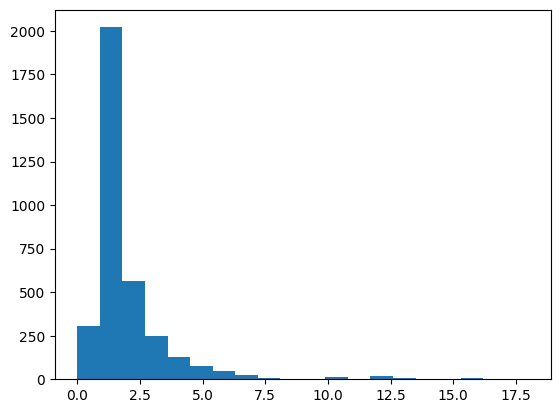

In [246]:
plt.hist(df.과제수,bins=20)
plt.show()

In [238]:
df.원어여부.value_counts()

원어여부
       2955
영어      522
중국어       6
Name: count, dtype: int64

In [234]:
df.선수과목존재여부.value_counts()

선수과목존재여부
0    3315
1     168
Name: count, dtype: int64

In [235]:
df.조별과제존재여부.value_counts()

조별과제존재여부
0    3319
1     164
Name: count, dtype: int64

In [236]:
df.시험과제대체여부.value_counts()

시험과제대체여부
0    2878
1     605
Name: count, dtype: int64

In [237]:
df.패논패여부.value_counts()

패논패여부
0    3477
1       6
Name: count, dtype: int64